In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile


In [ ]:
# Setup paths for local execution
import os
import sys

# Project directories
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))
DATA_DIR = os.path.join(BASE_DIR, 'data')
OUTPUT_DIR = os.path.join(BASE_DIR, 'outputs')
SRC_DIR = os.path.join(BASE_DIR, 'src')

# Add src to path
sys.path.insert(0, SRC_DIR)


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Unziping file to desired location

In [113]:
# zip_ref = zipfile.ZipFile("../../data/Data.zip", 'r')

In [114]:
# zip_ref.extractall("../../data/")
# zip_ref.close()

## Reading file in to pandas data frame for EDA Analysis

In [115]:
original = pd.read_csv('../../data/Data.csv')

In [116]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924446 entries, 0 to 924445
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      924446 non-null  object 
 1   StockCode    924446 non-null  object 
 2   Description  920261 non-null  object 
 3   Quantity     924446 non-null  int64  
 4   InvoiceDate  924446 non-null  object 
 5   Price        924446 non-null  float64
 6   Customer ID  716270 non-null  float64
 7   Country      924446 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 56.4+ MB


In [262]:
original.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,id_var
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-01-12,6.95,13085.0,United Kingdom,United Kingdom_85048
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-01-12,6.75,13085.0,United Kingdom,United Kingdom_79323P
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-01-12,6.75,13085.0,United Kingdom,United Kingdom_79323W
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-01-12,2.10,13085.0,United Kingdom,United Kingdom_22041
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-01-12,1.25,13085.0,United Kingdom,United Kingdom_21232


## count of each country stock

In [263]:
original['id_var'] = original['Country'].astype(str)+'_'+original['StockCode'].astype(str)

# Total Stock

In [264]:
total_count = original['id_var'].nunique()

### just checking start week date, as from '2011-11-07, forecasting has to be made for next 4 week

In [265]:
pd.to_datetime('2011/11/07').day_name()

'Monday'

In [266]:
original['InvoiceDate'] = pd.to_datetime(original['InvoiceDate'])

In [267]:
original['InvoiceDate'] = pd.to_datetime(original['InvoiceDate'].dt.date)

In [270]:
original['InvoiceDate'].min()

Timestamp('2009-01-12 00:00:00')

In [271]:
original.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,id_var
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-01-12,6.95,13085.0,United Kingdom,United Kingdom_85048
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-01-12,6.75,13085.0,United Kingdom,United Kingdom_79323P
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-01-12,6.75,13085.0,United Kingdom,United Kingdom_79323W
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-01-12,2.10,13085.0,United Kingdom,United Kingdom_22041
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-01-12,1.25,13085.0,United Kingdom,United Kingdom_21232


In [272]:
original['InvoiceDate'].max()

Timestamp('2011-12-10 00:00:00')

In [274]:
original['InvoiceDate'].dt.day

0         12
1         12
2         12
3         12
4         12
          ..
924441    31
924442    31
924443    31
924444    31
924445    31
Name: InvoiceDate, Length: 924440, dtype: int64

# % of cases where Quantity is negative

In [125]:
original.loc[original['Quantity'] < 0,].shape[0]/original.shape[0]

0.022604889847541124

# % of cases where price is negative

In [126]:
original.loc[original['Price'] <= 0,].shape[0]/original.shape[0]

0.006164773280429576

In [127]:
# !pip install category_encoders minepy eli5

In [128]:
import missingno as msno

# To see if negative value having some relationship with other variable

In [129]:
dat = original.copy()
dat.loc[original['Quantity'] < 0, 'Quantity'] = np.nan
dat.loc[original['Price'] < 0, 'Price'] = np.nan

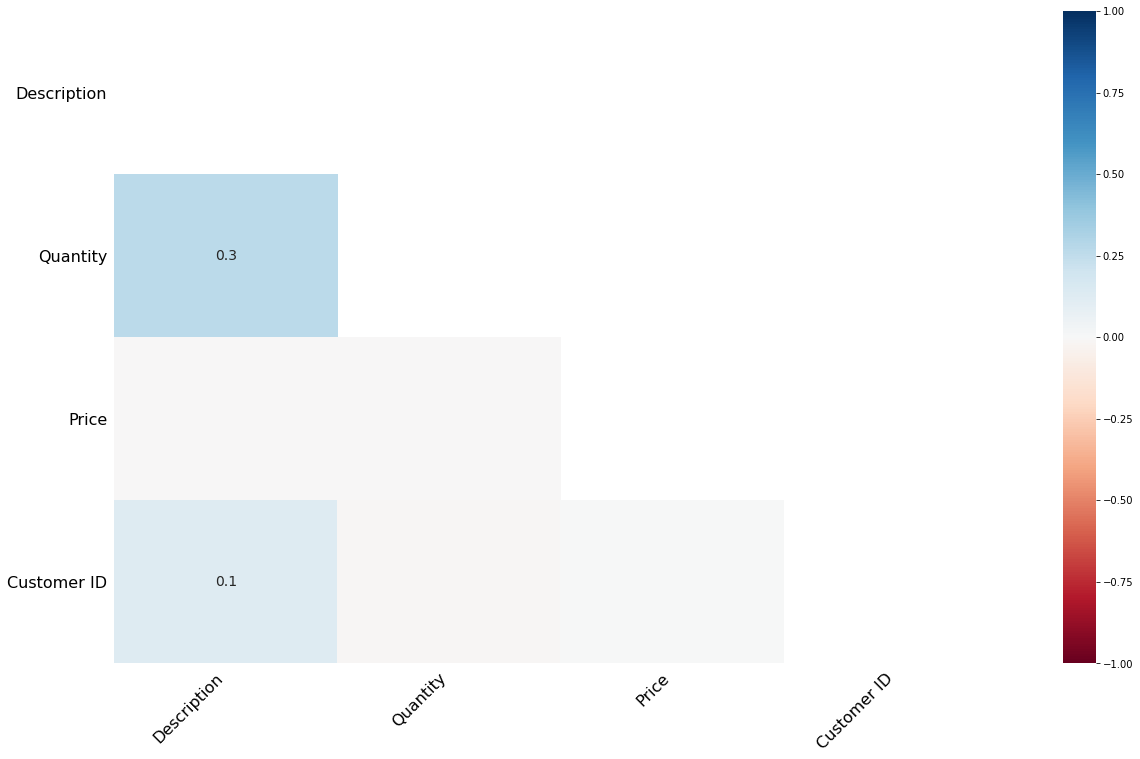

In [130]:
msno.heatmap(dat)

In [131]:
original.loc[original['Price'] < 0, ]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,id_var
177338,A506401,B,Adjust bad debt,1,2010-04-29,-53594.36,NaN,United Kingdom,United Kingdom_B
273025,A516228,B,Adjust bad debt,1,2010-07-19,-44031.79,NaN,United Kingdom,United Kingdom_B
398731,A528059,B,Adjust bad debt,1,2010-10-20,-38925.87,NaN,United Kingdom,United Kingdom_B
794040,A563186,B,Adjust bad debt,1,2011-12-08,-11062.06,NaN,United Kingdom,United Kingdom_B
794041,A563187,B,Adjust bad debt,1,2011-12-08,-11062.06,NaN,United Kingdom,United Kingdom_B


# All StockCode B, Price is negative. excluding it from forecasting process as it seems not reated to stock

In [132]:
original = original.loc[original['StockCode'] != 'B',]

In [133]:
originalm= original.loc[original['InvoiceDate'] < '11/7/2011',] 

In [134]:
originalm.loc[originalm['Quantity'] < 0,].shape

(20408, 9)

# Trying to see if negative Quantity is associted with stock starting with 'C', 84.3 % of negative sales are associated with Cancelled Invoice

In [135]:
dg = originalm.loc[originalm['Invoice'].isin(originalm.loc[originalm['Invoice'].str.startswith('C'),'Invoice'].unique().tolist()),]

In [136]:
dg

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,id_var
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-01-12,2.95,16321.0,Australia,Australia_22087
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-01-12,1.65,16321.0,Australia,Australia_85206A
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-01-12,4.25,16321.0,Australia,Australia_21895
181,C489449,21896,POTTING SHED TWINE,-6,2009-01-12,2.10,16321.0,Australia,Australia_21896
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-01-12,2.95,16321.0,Australia,Australia_22083
...,...,...,...,...,...,...,...,...,...
921655,C573502,21913,VINTAGE SEASIDE JIGSAW PUZZLES,-2,2011-10-31,3.75,14808.0,United Kingdom,United Kingdom_21913
921799,C573541,23462,ROCOCO WALL MIRROR WHITE,-1,2011-10-31,19.95,14738.0,United Kingdom,United Kingdom_23462
922021,C573549,AMAZONFEE,AMAZON FEE,-1,2011-10-31,5942.57,NaN,United Kingdom,United Kingdom_AMAZONFEE
922022,C573550,AMAZONFEE,AMAZON FEE,-1,2011-10-31,2185.04,NaN,United Kingdom,United Kingdom_AMAZONFEE


In [137]:
originalm.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,id_var
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-01-12,6.95,13085.0,United Kingdom,United Kingdom_85048
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-01-12,6.75,13085.0,United Kingdom,United Kingdom_79323P
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-01-12,6.75,13085.0,United Kingdom,United Kingdom_79323W
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-01-12,2.10,13085.0,United Kingdom,United Kingdom_22041
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-01-12,1.25,13085.0,United Kingdom,United Kingdom_21232


In [138]:
dg.loc[dg['Quantity'] < 0, ].shape[0]/originalm.loc[originalm['Quantity'] < 0,].shape[0]

0.8428067424539396

# Price Treatment

In [139]:
originalm = originalm.sort_values(by=['id_var','InvoiceDate'])

In [140]:
originalm.loc[originalm['Price'] == 0, 'Price'] = np.nan

In [141]:
price2 = originalm.groupby(['StockCode'])['Price'].mean().reset_index()

In [142]:
price2.head()

,StockCode,Price
0,10002,0.975348
1,10002R,5.133333
2,10080,0.536364
3,10109,0.420000
4,10120,0.243846


In [143]:
price2.fillna(-1,inplace=True)

In [144]:
price = originalm.groupby(['id_var'])['Price'].mean().reset_index()
originalm = originalm.merge(price[['id_var','Price']],on=['id_var'],how='left')

In [145]:
originalm.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price_x,Customer ID,Country,id_var,Price_y
0,500008,10002,INFLATABLE POLITICAL GLOBE,12,2010-04-03,0.85,12431.0,Australia,Australia_10002,0.85
1,529057,10002,INFLATABLE POLITICAL GLOBE,24,2010-10-26,0.85,12431.0,Australia,Australia_10002,0.85
2,553546,15036,ASSORTED COLOURS SILK FAN,600,2011-05-17,0.72,12415.0,Australia,Australia_15036,0.72
3,554126,15056BL,EDWARDIAN PARASOL BLACK,3,2011-05-23,5.95,12431.0,Australia,Australia_15056BL,5.95
4,534659,15058B,PINK POLKADOT GARDEN PARASOL,2,2010-11-23,7.95,12434.0,Australia,Australia_15058B,7.95


In [146]:
originalm.drop(['Price_x'],axis=1,inplace=True)
originalm = originalm.rename(columns={'Price_y':'Price'})

In [147]:
price

,id_var,Price
0,Australia_10002,0.85
1,Australia_15036,0.72
2,Australia_15056BL,5.95
3,Australia_15058B,7.95
4,Australia_16161P,0.34
...,...,...
27224,West Indies_84508A,2.55
27225,West Indies_84795B,7.95
27226,West Indies_84827,0.65
27227,West Indies_84944,4.25


In [148]:
originalm = originalm.groupby(['id_var','InvoiceDate'])[['Quantity','Price']].agg({'Quantity':np.mean,'Price':np.mean}).reset_index()

In [149]:
originalm['year'] = originalm['InvoiceDate'].dt.year

In [150]:
originalm.loc[originalm['id_var'].isin(price.loc[price['Price'].isnull(),'id_var'].tolist()),'Price'].value_counts()

Series([], Name: Price, dtype: int64)

In [151]:
originalm['Price'] = originalm['Price'].fillna(-1)

In [152]:
originalm.loc[originalm['Quantity'] < 0,'Quantity'] = 0

In [153]:
originalm.head()

,id_var,InvoiceDate,Quantity,Price,year
0,Australia_10002,2010-04-03,12.0,0.85,2010
1,Australia_10002,2010-10-26,24.0,0.85,2010
2,Australia_15036,2011-05-17,600.0,0.72,2011
3,Australia_15056BL,2011-05-23,3.0,5.95,2011
4,Australia_15058B,2010-11-23,2.0,7.95,2010


In [154]:
country_stock = originalm['id_var'].str.split("_", n = 1, expand = True)
originalm['Country'] = country_stock[0]
originalm['StockCode'] = country_stock[1]

In [155]:
originalm = originalm.groupby(['StockCode','InvoiceDate'])[['Quantity','Price']].agg({'Quantity':np.sum,'Price':np.mean}).reset_index()

In [156]:
originalm.head()

,StockCode,InvoiceDate,Quantity,Price
0,10002,2009-01-12,12.000000,1.001090
1,10002,2009-03-12,2.000000,1.001090
2,10002,2009-04-12,56.333333,0.925545
3,10002,2009-06-12,49.000000,0.925545
4,10002,2009-07-12,2.000000,1.001090


# total Stock

In [157]:
originalm['StockCode'].nunique()

5264

In [158]:
originalm.describe()

,Quantity,Price
count,485418.000000,485418.000000
mean,12.615037,4.379445
std,86.992068,41.568179
min,0.000000,-1.000000
25%,1.500000,1.327194
50%,4.000000,2.243447
75%,12.000000,4.147450
max,19152.000000,6839.679375


In [159]:
originalm['year'] = originalm['InvoiceDate'].dt.year

In [160]:
total_sales = originalm['Quantity'].sum()

In [161]:
oc = originalm.groupby(['StockCode','year'])['Quantity'].sum().reset_index()

In [162]:
exclude = oc.loc[((oc['year']==2011) & (oc['Quantity']==0)),'StockCode']

In [163]:
len(exclude)

163

In [164]:
data = originalm.loc[~originalm['StockCode'].isin(exclude.values),]

In [165]:
stock_dist = originalm.groupby(['StockCode','year'])['InvoiceDate'].count().reset_index()

In [166]:
stock_dist

,StockCode,year,InvoiceDate
0,10002,2009,12
1,10002,2010,181
2,10002,2011,34
3,10002R,2009,2
4,10002R,2010,1
...,...,...,...
11574,gift_0001_70,2010,3
11575,gift_0001_80,2009,1
11576,gift_0001_80,2010,2
11577,gift_0001_90,2010,2


In [167]:
fig, ax = plt.subplots(figsize=(20,10))
lplot = sns.histplot(data=stock_dist, x="StockCode", y="InvoiceDate", hue='year',ax=ax)
plt.title('StockCode Count by year')


Text(0.5, 1.0, 'StockCode Count by year')

Error in callback <function flush_figures at 0x7f9921300440> (for post_execute):


KeyboardInterrupt: ignored

In [168]:
# data = originalm.loc[~originalm['StockCode'].isin(exclude.values),]

In [172]:
stock_dist.head()

,StockCode,year,InvoiceDate
1,10002,2010,181
2,10002,2011,34
7,10080,2011,16
11,10120,2010,34
12,10120,2011,15


In [173]:
stock_dist = stock_dist.loc[stock_dist['InvoiceDate'] >= 14,]

In [174]:
stock_dist['StockCode'].nunique()

3546

In [175]:
data['StockCode'].nunique()

5101

In [176]:
data.head()

,StockCode,InvoiceDate,Quantity,Price,year
0,10002,2009-01-12,12.000000,1.001090,2009
1,10002,2009-03-12,2.000000,1.001090,2009
2,10002,2009-04-12,56.333333,0.925545,2009
3,10002,2009-06-12,49.000000,0.925545,2009
4,10002,2009-07-12,2.000000,1.001090,2009


In [177]:
data = data.loc[data['StockCode'].isin(stock_dist['StockCode'])].reset_index(drop=True)

In [178]:
excdata = data.loc[~data['StockCode'].isin(stock_dist['StockCode'])].reset_index(drop=True)

In [179]:
data['StockCode'].nunique()


3456

In [180]:
data.shape

(466138, 5)

In [181]:
datg = data.copy()

In [182]:
# datg.loc[datg['Quantity'] < 0,'Quantity']

In [183]:
datg = datg.sort_values(by = ['StockCode','InvoiceDate'])

In [184]:
datg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466138 entries, 0 to 466137
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   StockCode    466138 non-null  object        
 1   InvoiceDate  466138 non-null  datetime64[ns]
 2   Quantity     466138 non-null  float64       
 3   Price        466138 non-null  float64       
 4   year         466138 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 21.3+ MB


In [185]:
country_stock = datg.groupby(['StockCode'])['InvoiceDate'].count().reset_index()
country_stock = country_stock.sort_values(by=['InvoiceDate',],ascending=False)

In [186]:
country_stock['InvoiceDate'].sum()

466138

In [187]:
total_sales

6123566.114538684

# around 87.4 % of the stock have less than 14 data points

In [188]:
1 - (originalm.loc[originalm['StockCode'].isin(country_stock['StockCode'].unique()),'StockCode'].nunique()/total_count)

0.8747826086956522

In [189]:
(data['Quantity'].sum()/total_sales)

0.9624840718481088

In [190]:
st = originalm.loc[originalm['StockCode'].isin(country_stock['StockCode'].unique()),'StockCode'].value_counts().reset_index()

In [191]:
st = st.rename(columns={'index':'sc'})

In [192]:
st.head()

,sc,StockCode
0,85123A,557
1,20725,549
2,21212,549
3,85099B,547
4,21080,540


Text(0.5, 1.0, 'StockCode Count by year')

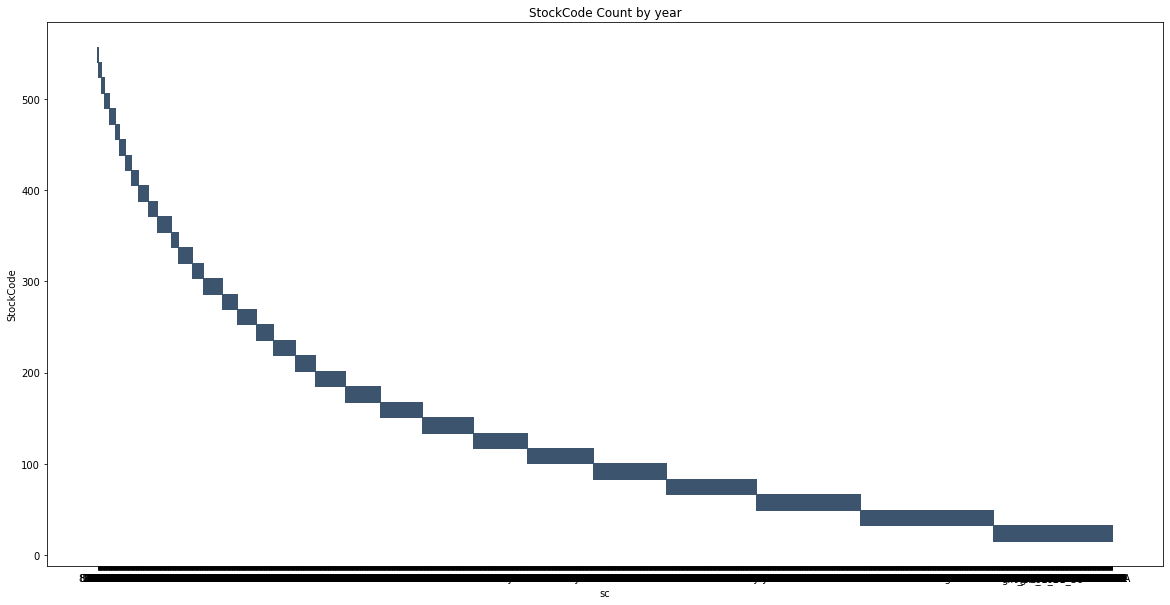

In [193]:
fig, ax = plt.subplots(figsize=(20,10))
lplot = sns.histplot(data=st, x = 'sc', y="StockCode",ax=ax)
plt.title('StockCode Count by year')

Text(0.5, 1.0, 'StockCode Count by year')

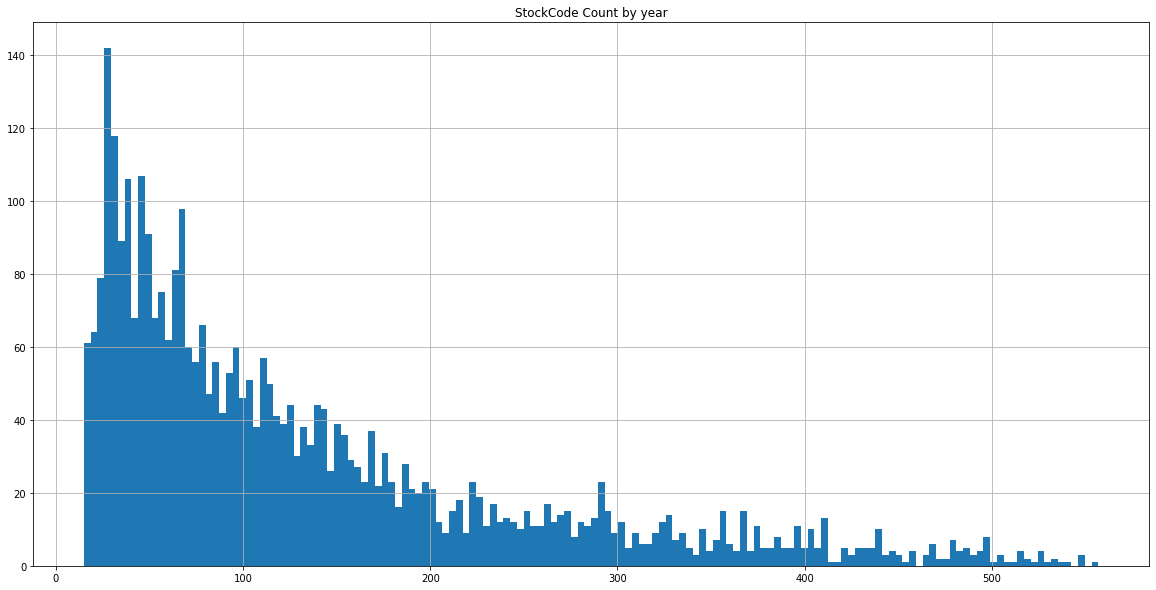

In [194]:
fig, ax = plt.subplots(figsize=(20,10))
country_stock['InvoiceDate'].hist(ax=ax,bins=150)
plt.title('StockCode Count by year')

In [195]:
datg['StockCode'].nunique()

3456

# Pivoting to fill missing date. Actually to populate date for all stock until maximum date '2011-07-11

In [196]:
data = pd.pivot_table(datg,columns=['StockCode'],values=['Quantity'],index=['InvoiceDate'])

In [197]:
data.head()

Quantity                     ...                                     
StockCode        10002 10080 10120 10123C  ... PADS  POST gift_0001_20 gift_0001_30
InvoiceDate                                ...                                     
2009-01-12   12.000000   NaN  60.0    3.0  ...  NaN  11.5          NaN          NaN
2009-02-12         NaN   1.0  10.0    NaN  ...  NaN   1.0          NaN          NaN
2009-03-12    2.000000   NaN   NaN    NaN  ...  NaN   0.0          NaN          NaN
2009-04-12   56.333333   1.5  30.0    1.0  ...  NaN  11.5          NaN          NaN
2009-05-12         NaN   NaN   NaN    NaN  ...  NaN   NaN          NaN          NaN

[5 rows x 3456 columns]

In [198]:
data.columns = [x for (y,x) in data.columns]

In [199]:
dat = data.fillna(0)

In [200]:
dat['InvoiceDate'] = dat.index

In [201]:
dat = dat.reset_index(drop=True)

In [202]:
dat.head()

,10002,10080,10120,10123C,10124A,10125,10133,10135,11001,15034,15036,15039,15044A,15044B,15044C,15044D,15056BL,15056N,15056P,15056bl,15056n,15056p,15058A,15058B,15058C,15060B,16008,16011,16012,16014,16015,16016,16020C,16033,16045,16046,16047,16048,16049,16052,...,90200D,90200E,90201A,90201B,90201C,90201D,90203,90204,90206C,90208,90209B,90209C,90210B,90211B,90212B,90214A,90214B,90214C,90214D,90214E,90214G,90214H,90214J,90214K,90214L,90214M,90214N,90214P,90214R,90214S,BANK CHARGES,C2,DCGS0058,DOT,M,PADS,POST,gift_0001_20,gift_0001_30,InvoiceDate
0,12.000000,0.0,60.0,3.0,0.0,2.500000,6.000000,5.666667,2.00,1.5,27.5,0.0,0.0,1.0,1.0,2.5,18.0,13.666667,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,11.5,0.0,0.0,2009-01-12
1,0.000000,1.0,10.0,0.0,0.0,0.000000,0.000000,20.000000,17.25,0.0,7.5,0.0,0.0,0.0,0.0,0.0,62.5,4.500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,5.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2009-02-12
2,2.000000,0.0,0.0,0.0,0.0,0.000000,13.333333,4.666667,2.00,0.0,121.5,10.0,0.0,0.0,0.0,1.0,157.5,154.500000,600.0,0.0,0.0,0.0,0.0,0.0,0.0,2.333333,0.0,0.0,0.0,20.0,30.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2009-03-12
3,56.333333,1.5,30.0,1.0,0.0,7.666667,12.500000,10.000000,0.00,0.0,12.0,0.0,0.0,0.0,0.0,0.0,34.5,3.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,24.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,432.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,11.5,0.0,0.0,2009-04-12
4,0.000000,0.0,0.0,0.0,0.0,0.000000,10.000000,0.000000,0.00,0.0,12.0,0.0,0.0,0.0,0.0,0.0,7.5,7.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2009-05-12


# melting data again

In [203]:
dat = pd.melt(dat,id_vars=['InvoiceDate'])

In [204]:
dat.head()

,InvoiceDate,variable,value
0,2009-01-12,10002,12.000000
1,2009-02-12,10002,0.000000
2,2009-03-12,10002,2.000000
3,2009-04-12,10002,56.333333
4,2009-05-12,10002,0.000000


In [205]:
dat = dat.rename(columns={'variable':'StockCode'})

In [206]:
dat['StockCode'].nunique()

3456

In [207]:
start_stoc_date = datg.groupby(['StockCode'])['InvoiceDate'].min().reset_index()

In [208]:
start_stoc_date = start_stoc_date.rename(columns={'InvoiceDate':'start_date'})

In [209]:
dat = dat.merge(start_stoc_date, on = ['StockCode'],how='left')

# Since data is pivoted first before melting date of all stock is starting with 2009-01-12 filling lot of zero

In [210]:
dat.head()

,InvoiceDate,StockCode,value,start_date
0,2009-01-12,10002,12.000000,2009-01-12
1,2009-02-12,10002,0.000000,2009-01-12
2,2009-03-12,10002,2.000000,2009-01-12
3,2009-04-12,10002,56.333333,2009-01-12
4,2009-05-12,10002,0.000000,2009-01-12


In [211]:
dat = dat.loc[dat['start_date'] <= dat['InvoiceDate'],  ].sort_values(['StockCode','InvoiceDate'])

In [212]:
dat.drop(['start_date'],axis=1,inplace=True)

In [213]:
dat.head()

,InvoiceDate,StockCode,value
0,2009-01-12,10002,12.000000
1,2009-02-12,10002,0.000000
2,2009-03-12,10002,2.000000
3,2009-04-12,10002,56.333333
4,2009-05-12,10002,0.000000


In [214]:
original.loc[original['InvoiceDate']== '2010-06-11',]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,id_var


# it seems for some date data is not there for entire row, So filling missing date again

In [234]:
datgc = dat.copy()

In [258]:
datgc['InvoiceDate'] = pd.to_datetime(datgc['InvoiceDate'],format='%Y-%mm-%d')

In [259]:
datgc.head()

,InvoiceDate,StockCode,value
0,2009-01-12,10002,12.000000
1,2009-02-12,10002,0.000000
2,2009-03-12,10002,2.000000
3,2009-04-12,10002,56.333333
4,2009-05-12,10002,0.000000


In [261]:
datgc['InvoiceDate'].dt.day

0          12
1          12
2          12
3          12
4          12
           ..
1928443     1
1928444     2
1928445     3
1928446     4
1928447     5
Name: InvoiceDate, Length: 1744887, dtype: int64

In [233]:
datgc = (datgc.set_index('InvoiceDate')
   .groupby(['StockCode']).apply(lambda x: x.drop(['StockCode'],axis=1).asfreq('D'))
   .reset_index()
)

AttributeError: ignored

In [227]:
datgc = datgc.fillna(0)

In [228]:
datgc['timeelapsed'] = datgc.groupby(['StockCode'])[['InvoiceDate']].shift(1)

In [229]:
datgc.head()

,StockCode,InvoiceDate,value,timeelapsed
0,10002,2009-01-12,12.0,NaT
1,10002,2009-01-13,0.0,2009-01-12
2,10002,2009-01-14,0.0,2009-01-13
3,10002,2009-01-15,0.0,2009-01-14
4,10002,2009-01-16,0.0,2009-01-15


In [101]:
# datgc['timeelapsed']

In [102]:
datgc['timeelapsed'] = (datgc['InvoiceDate'].sub(datgc['timeelapsed'],axis=0).dt.days).fillna(1)

In [103]:
datgc.head()

,InvoiceDate,StockCode,value,timeelapsed
0,2009-01-12,10002,12.000000,1.0
1,2009-02-12,10002,0.000000,31.0
2,2009-03-12,10002,2.000000,28.0
3,2009-04-12,10002,56.333333,31.0
4,2009-05-12,10002,0.000000,30.0


In [104]:
datgc = datgc.rename(columns={'value':'Quantity'})

In [105]:
datgc['cumsum'] = datgc.groupby(['StockCode'])['Quantity'].cumsum()

In [106]:
datgc['cumdist'] = datgc.groupby(['StockCode','cumsum'])['timeelapsed'].cumsum()-1

In [107]:
datgc.head()

,InvoiceDate,StockCode,Quantity,timeelapsed,cumsum,cumdist
0,2009-01-12,10002,12.000000,1.0,12.000000,0.0
1,2009-02-12,10002,0.000000,31.0,12.000000,31.0
2,2009-03-12,10002,2.000000,28.0,14.000000,27.0
3,2009-04-12,10002,56.333333,31.0,70.333333,30.0
4,2009-05-12,10002,0.000000,30.0,70.333333,60.0


In [108]:
value_after_zero = datgc.groupby('StockCode')['cumdist'].mean().reset_index()

In [109]:
value_after_zero.sort_values(by = ['cumdist'],ascending=False)

,StockCode,cumdist
652,21480,330.415771
2731,84029C,223.347670
759,21649,186.863799
2434,37410,179.189964
2547,47592B,164.246403
...,...,...
1349,22379,0.497207
2559,48138,0.466055
1354,22384,0.439479
1352,22382,0.420857


Text(0.5, 1.0, 'Cumulative Zero between no zero value')

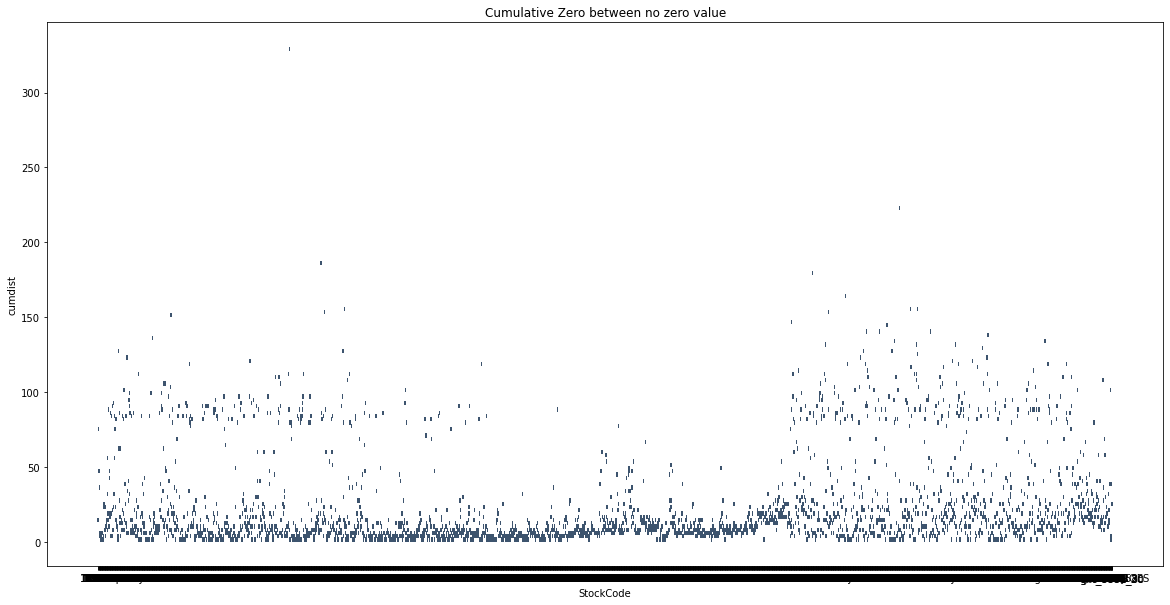

In [110]:
fig, ax = plt.subplots(figsize=(20,10))
lplot = sns.histplot(data=value_after_zero, x = 'StockCode', y="cumdist",ax=ax)
plt.title('Cumulative Zero between no zero value')

In [ ]:
# value_after_zero.loc[value_after_zero['cumdist'] < 53,'StockCode'].nunique()

2947

In [ ]:
# stock_cont = datg.groupby(['StockCode'])['Quantity'].sum().reset_index()

In [ ]:

value_after_zero.loc[value_after_zero['cumdist'] < 366,'StockCode'].nunique()/total_count

0.12521739130434784

In [ ]:
originalm.loc[originalm['StockCode'].isin(value_after_zero.loc[value_after_zero['cumdist'] < 366,'StockCode'].unique()),'Quantity'].sum()/total_sales

0.9624840718481088

In [ ]:
# stock_cont.loc[stock_cont['StockCode'].isin(value_after_zero.loc[value_after_zero['cumdist'] < 366,'StockCode'].unique()),'Quantity'].sum() / stock_cont['Quantity'].sum()

In [ ]:
datgc.drop(['timeelapsed'],axis=1,inplace=True)

In [ ]:
datgc = datgc.loc[datgc['StockCode'].isin(value_after_zero.loc[value_after_zero['cumdist'] < 366,'StockCode'].unique()),]

In [ ]:
datgc['StockCode'].nunique()

3456

In [ ]:
datgc.shape

(2793970, 5)

In [ ]:
datgc.head()

,StockCode,InvoiceDate,Quantity,cumsum,cumdist
0,10002,2009-01-12,12.0,12.0,0.0
1,10002,2009-01-13,0.0,12.0,1.0
2,10002,2009-01-14,0.0,12.0,2.0
3,10002,2009-01-15,0.0,12.0,3.0
4,10002,2009-01-16,0.0,12.0,4.0


## Adding Some date related feature

In [ ]:
######### Feature Creation

In [ ]:
# datgc['month'] = datgc['InvoiceDate'].dt.month
# datgc['dow'] = datgc['InvoiceDate'].dt.dayofweek
# datgc['qtr'] = datgc['InvoiceDate'].dt.quarter
# datgc['year'] = datgc['InvoiceDate'].dt.year
# datgc['dom'] = datgc['InvoiceDate'].dt.day
# datgc['doy'] = datgc['InvoiceDate'].dt.dayofyear

In [ ]:
# def weekinmonth(x):
#     fdom = x.dt.day // 7
#     return fdom

In [ ]:
# datgc['fdom'] = weekinmonth(datgc['InvoiceDate'])

In [ ]:
# country_stock = datgc['id_var'].str.split("_", n = 1, expand = True)
# datgc['Country'] = country_stock[0]
# datgc['StockCode'] = country_stock[1]

In [ ]:
datgc.head()

,StockCode,InvoiceDate,Quantity,cumsum,cumdist
0,10002,2009-01-12,12.0,12.0,0.0
1,10002,2009-01-13,0.0,12.0,1.0
2,10002,2009-01-14,0.0,12.0,2.0
3,10002,2009-01-15,0.0,12.0,3.0
4,10002,2009-01-16,0.0,12.0,4.0


In [ ]:
## holiday feature

In [ ]:
import holidays

In [ ]:
# countrylistLoop = datgc['Country'].unique()

In [ ]:
# len(countrylistLoop)

In [ ]:
# country = {}
# for count in countrylistLoop:
#   try:
#     dat = []
#     for date, name in sorted(holidays.CountryHoliday(count, years=np.arange(2008,2012,1)).items()):
#       dat.append(date)
#     country[count]=pd.to_datetime(dat)
#   except:
#     pass
    

In [ ]:
# len(country)

In [ ]:
# datgc['holiday'] = -1

In [ ]:
# for key in country.keys():
#   if key in countrylistLoop:
#     datgc.loc[datgc['Country']==key,'holiday'] = np.where(datgc.loc[datgc['Country']==key,'InvoiceDate'].isin(country[key]),1,0)  

In [ ]:
datgc.head()

,StockCode,InvoiceDate,Quantity,cumsum,cumdist
0,10002,2009-01-12,12.0,12.0,0.0
1,10002,2009-01-13,0.0,12.0,1.0
2,10002,2009-01-14,0.0,12.0,2.0
3,10002,2009-01-15,0.0,12.0,3.0
4,10002,2009-01-16,0.0,12.0,4.0


In [ ]:
# import sys
# # insert at 1, 0 is the script path (or '' in REPL)
# sys.path.insert(1, '/content/drive/My Drive/ML_AI/DeepFuture/')

In [ ]:
# import FourierComponent as FC

In [ ]:
datgc.head()

,StockCode,InvoiceDate,Quantity,cumsum,cumdist
0,10002,2009-01-12,12.0,12.0,0.0
1,10002,2009-01-13,0.0,12.0,1.0
2,10002,2009-01-14,0.0,12.0,2.0
3,10002,2009-01-15,0.0,12.0,3.0
4,10002,2009-01-16,0.0,12.0,4.0


In [ ]:
# datgc = datgc.merge(originalm[['id_var','Price']], on = ['id_var'], how='left')

In [ ]:
datgc['ds'] = datgc['InvoiceDate']


In [ ]:
# datgc.drop(['InvoiceDate','Country','StockCode'],axis=1,inplace=True)


In [ ]:
datgc.head()

,StockCode,InvoiceDate,Quantity,cumsum,cumdist,ds
0,10002,2009-01-12,12.0,12.0,0.0,2009-01-12
1,10002,2009-01-13,0.0,12.0,1.0,2009-01-13
2,10002,2009-01-14,0.0,12.0,2.0,2009-01-14
3,10002,2009-01-15,0.0,12.0,3.0,2009-01-15
4,10002,2009-01-16,0.0,12.0,4.0,2009-01-16


In [ ]:
import gc
gc.collect()

34

In [ ]:
datgc.to_csv('../../data/stock_data_week.csv')

In [ ]:
price.head()

,id_var,Price
0,Australia_10002,0.85
1,Australia_15036,0.72
2,Australia_15056BL,5.95
3,Australia_15058B,7.95
4,Australia_16161P,0.34


In [ ]:
country_stock = price['id_var'].str.split('_',n=1,expand=True)

In [ ]:
# price['Country'] = country_stock[0]
# price['StockCode']= country_stock[1]

In [ ]:
price2.to_csv('../../data/price2.csv')

In [ ]:
import missingno as msno

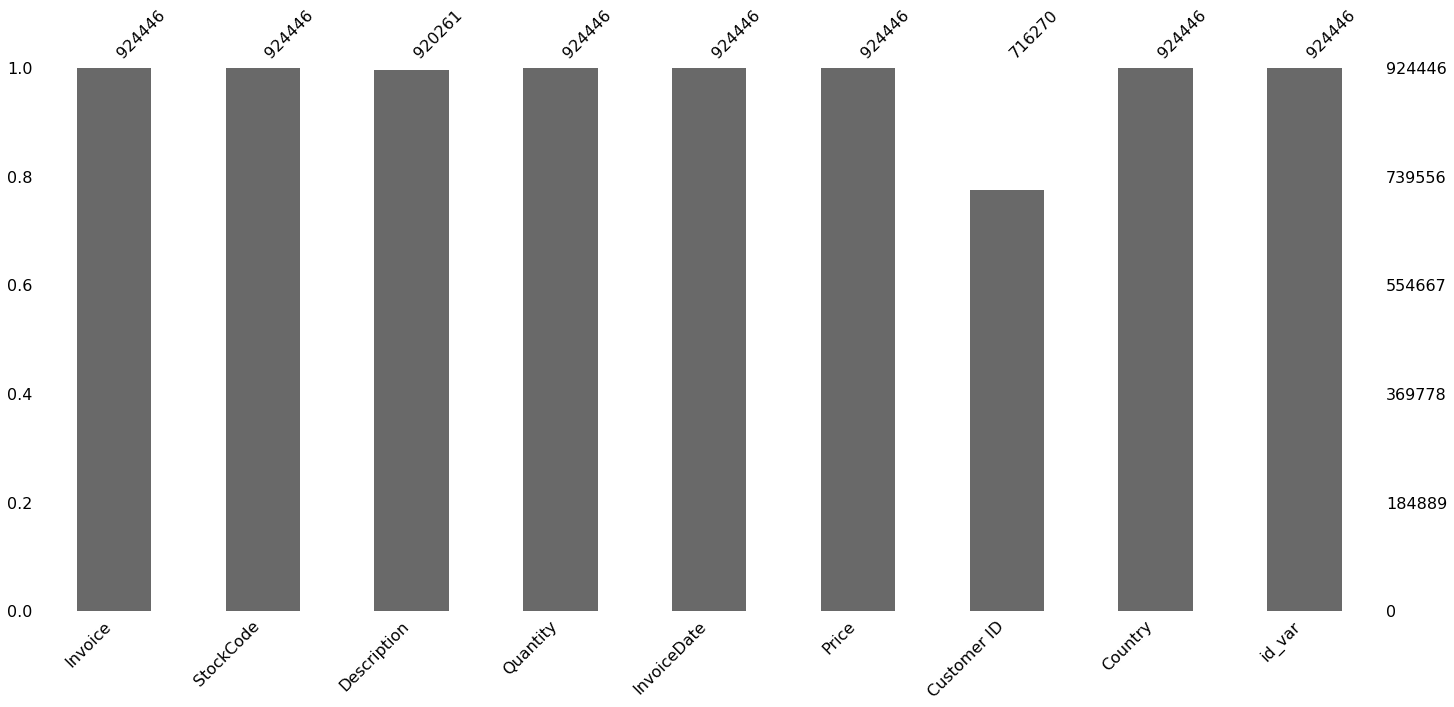

In [ ]:
msno.bar(original)